# If a Decision Tree is overfit in a Random Forest, does it make a sound? 

--or--


# If a Decision Tree falls in a Random Forest, does anyone care? 

Decision trees are a type of model used for both classification and regression. Trees answer sequential questions which send us down a certain route of the tree given the answer. The model behaves with “if this than that” conditions ultimately yielding a specific result.

A random forest is simply a collection of decision trees whose results are aggregated into one final result. Their ability to limit overfitting without substantially increasing error due to bias is why they are such powerful models.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import the data
df = pd.read_csv('data/kyphosis.csv')
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA
Kyphosis is a curvature of the spine, and this dataset documents children who have had corrective spinal surgery. The data dictionary is here: https://vincentarelbundock.github.io/Rdatasets/doc/rpart/kyphosis.html

Usually we'd do a lot more exploratory data analysis. But we're pressed for time, so let's see all the relations we can using the pairplot

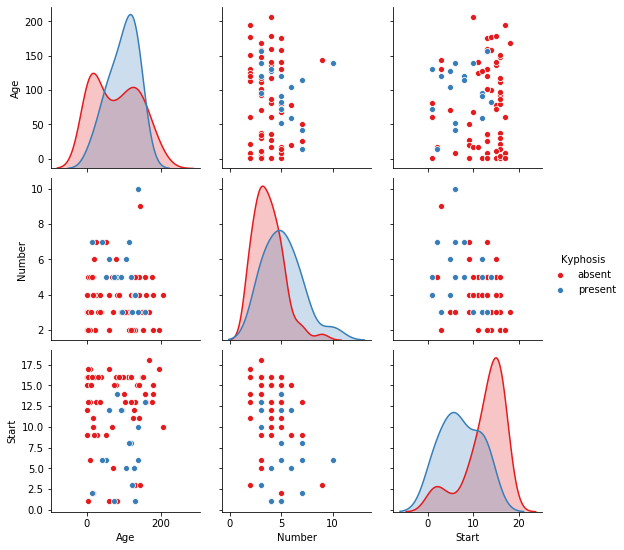

In [3]:
sns.pairplot(df, hue = "Kyphosis", palette = "Set1")

## Decision Tree Data Science!

In [4]:
#Train test split
from sklearn.model_selection import train_test_split

X = df.drop("Kyphosis", axis = 1)
y = df["Kyphosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = .30, random_state = 42)

In [11]:
#A Single little decision tree
##Import
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

##Instantiate
dtree = DecisionTreeClassifier()

#Fit
dtree.fit(X_train, y_train)

#predict
dt_pred = dtree.predict(X_test)

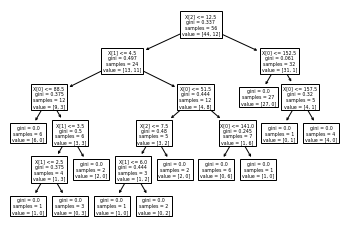

In [13]:
tree.plot_tree(dtree);

In [7]:
#evaluate
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

      absent       0.86      0.90      0.88        20
     present       0.50      0.40      0.44         5

    accuracy                           0.80        25
   macro avg       0.68      0.65      0.66        25
weighted avg       0.79      0.80      0.79        25



In [10]:
print(confusion_matrix(y_test, dt_pred))

[[18  2]
 [ 3  2]]



## Let's compare to a random forest of happy little trees

In [14]:
#import 
from sklearn.ensemble import RandomForestClassifier

#instantiate
rfc = RandomForestClassifier(n_estimators=100)

#fit
rfc.fit(X_train, y_train)

#predict
rfc_pred = rfc.predict(X_test)

rfc_train_pred = rfc.predict(X_train)

In [15]:
#evaluate
print(classification_report(y_train,rfc_train_pred))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        44
     present       1.00      1.00      1.00        12

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56

